## Projeto 1 - Trans cal 

Luiza Coutinho /
Daniel Marco /
Gabriel Buhrer /
Fernando Koelle


Sistema par

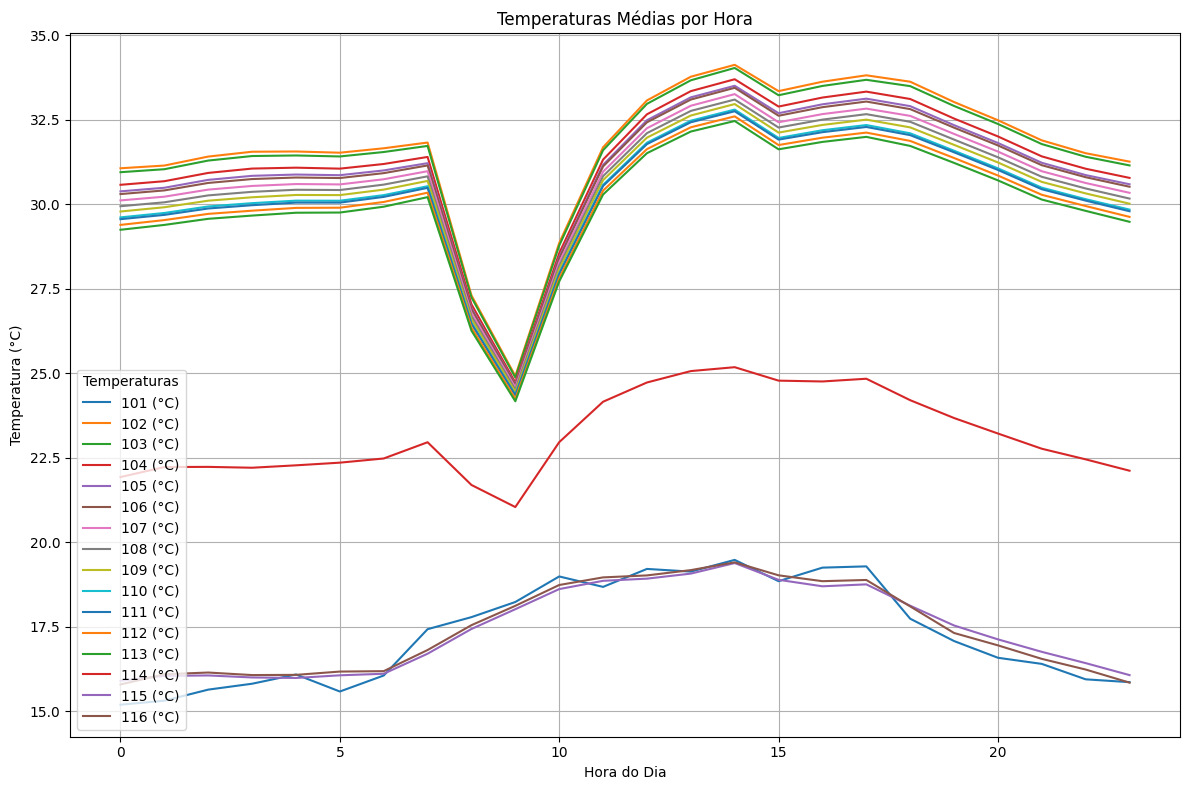

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import math 
from sympy import symbols, diff

# Carregar os dados a partir da linha correta (linha 40)
df_data_corrected = pd.read_excel('dados.xlsx', sheet_name='Planilha1', header=39)

# Coluna de tempo e colunas de temperatura
time_column = 'Scan Sweep Time (Sec)'
temperature_columns = [f'{i} (°C)' for i in range(101, 117)]

# Converter a coluna de tempo para considerar apenas as horas e agrupar os dados por hora
df_data_corrected['Hour'] = pd.to_datetime(df_data_corrected[time_column], errors='coerce').dt.hour

# Calcular a média simples das temperaturas para cada hora
df_grouped = df_data_corrected.groupby('Hour').mean()

# Plotar o gráfico com as médias horárias das temperaturas
plt.figure(figsize=(12, 8))

for temp_col in temperature_columns:
    plt.plot(df_grouped.index, df_grouped[temp_col], label=temp_col)

# Adicionar título e rótulos aos eixos
plt.title('Temperaturas Médias por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Temperatura (°C)')
plt.legend(title='Temperaturas')
plt.grid(True)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


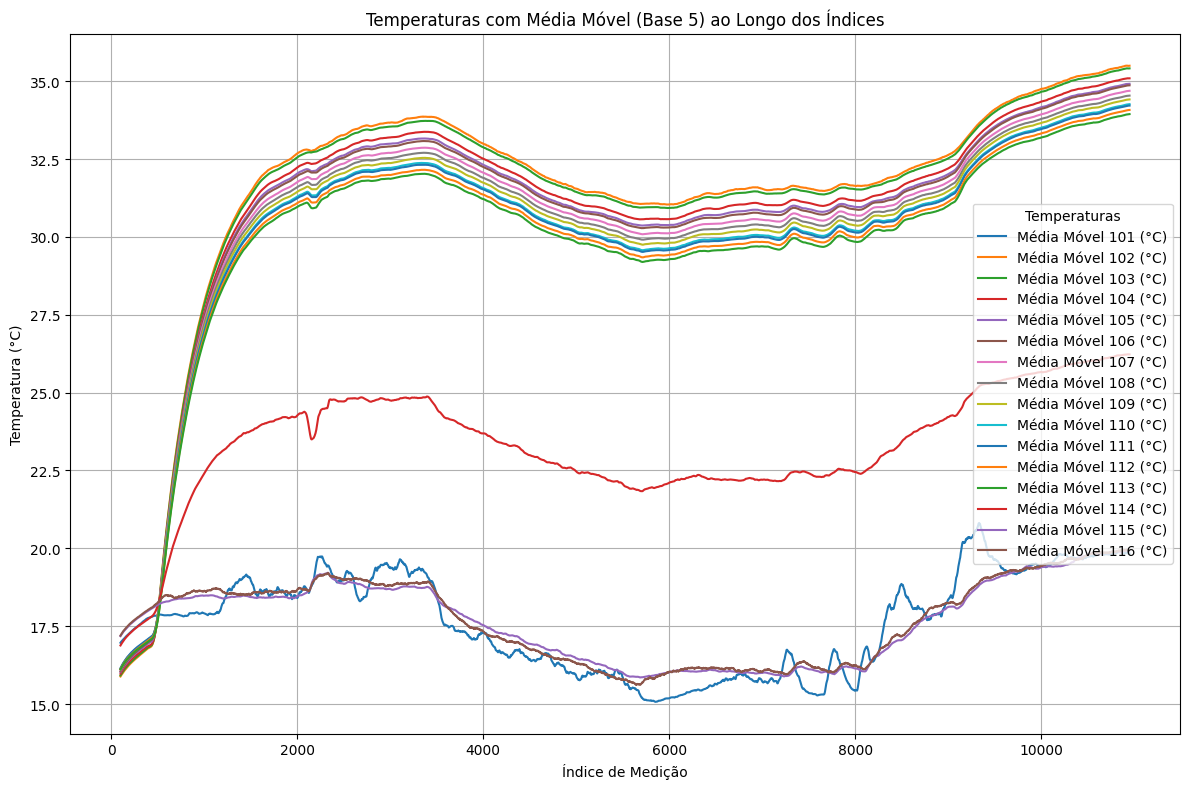

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados a partir da linha correta (linha 40)
df_data_corrected = pd.read_excel('dados.xlsx', sheet_name='Planilha1', header=39)

# Colunas de temperatura que iremos usar
temperature_columns = [f'{i} (°C)' for i in range(101, 117)]

# Criar uma coluna de índices de 1 até o tamanho das medições de temperatura
df_data_corrected['Index'] = range(1, len(df_data_corrected) + 1)

# Aplicar a média móvel com base 5 em cada coluna de temperatura
df_data_corrected_moving_avg = df_data_corrected.copy()
for temp_col in temperature_columns:
    df_data_corrected_moving_avg[temp_col] = df_data_corrected[temp_col].rolling(window=100).mean()

# Plotar o gráfico com os índices e a média móvel
plt.figure(figsize=(12, 8))

for temp_col in temperature_columns:
    plt.plot(df_data_corrected_moving_avg['Index'], df_data_corrected_moving_avg[temp_col], label=f'Média Móvel {temp_col}')

# Adicionar título e rótulos aos eixos
plt.title('Temperaturas com Média Móvel (Base 5) ao Longo dos Índices')
plt.xlabel('Índice de Medição')
plt.ylabel('Temperatura (°C)')
plt.legend(title='Temperaturas')
plt.grid(True)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


# Exercício 1

| Propriedade               | Valor   |
|---------------------------|---------|
| Número do sistema          | 2       |
| Resistência elétrica (Ω)   | 6,5     |
| Tensão Aplicada (V)        | 100     |


# Exercicio 2

Achando equação da reta para realizar a interpolação e descobrir k_t da nossa Temperatura de filme

Calculando médias gerais de cada ponto da aleta

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('dados.xlsx', sheet_name='Planilha1', header=39)


start_row = 5364
end_row = 7543

coluna_t_amb = ['101 (°C)']
coluna_t_base = ['102 (°C)']
colunas_desejadas = [f"{i} (°C)" for i in range(102, 113)]

# Calcular as médias das colunas entre as linhas 5365 e 7543
media_t_amb =df.loc[start_row:end_row, coluna_t_amb].mean()
media_t_base =df.loc[start_row:end_row, coluna_t_base].mean()
medias_aleta = df.loc[start_row:end_row, colunas_desejadas].mean().tolist()

# Exibir a lista de médias
# print(len(medias_aleta))
print(media_t_amb)
print(media_t_base)
# print (medias_aleta)

101 (°C)    15.61163
dtype: float64
102 (°C)    31.350312
dtype: float64


Calculando Tf a partir das médias

In [23]:
media_total =pd.Series(medias_aleta).mean()

Tf= (media_total+media_t_amb)/2
print (media_total)
# print(media_t_amb)
# print(Tf)

30.43713269391159


Descobrindo k a partir de Tf

In [24]:
a = (156.88 - 155.68) / (51.67 - 37.38)

def acha_t(T):
    k_t = a*T - a*37.78 + 155.68
    return k_t


K_tf = acha_t(Tf)
print (f"k é igual a:{0}",(K_tf))

k é igual a:0 101 (°C)    154.4409
dtype: float64


# Exercício 3


### A) 

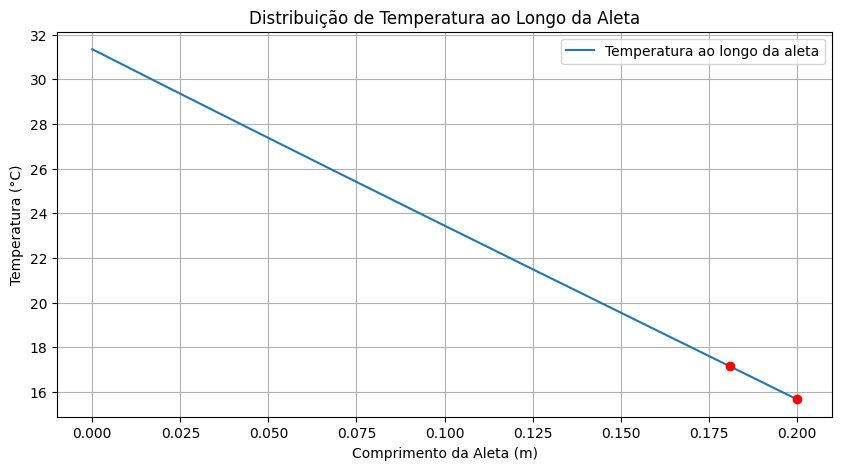

Valor de h: 7.5 W/(m²·K)


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import math

def acha_k(T):
    a = (156.88 - 155.68) / (51.67 - 37.38)
    k_t = a*T - a*37.78 + 155.68
    return k_t

# Parâmetros e configuração
L = 0.2  # Comprimento total da aleta em metros
L_termopar = 0.181  # Posição do último termopar em metros
T_base = 31.35  # Temperatura na base em °C
T_ambiente = 15.61  # Temperatura ambiente em °C
theta_0 = T_base - T_ambiente
Atr = math.pi * (0.012**2) # Atr
p = 2 * math.pi * 0.012 * L # Perímetro em metrosS
A = 0.012 * 0.2  # Área da seção transversal em m²
k = acha_k(30.43)  # Chamada da função para calcular k
h = 7.5  # Valor estimado de h
m = np.sqrt(h * p / (k*Atr))  # Cálculo de m




# Função de distribuição de temperatura considerando convecção na extremidade
def temperatura(m, l, h, x, k):
    num = math.cosh(m * (l - x)) + (h / m * k) * math.sinh(m * (l - x))
    den = math.cosh(m * l) + (h / m * k) * math.sinh(m * l)
    return num / den



# Preparando valores de x e calculando a temperatura
x_vals = np.linspace(0, L, 20000)
theta_vals = [theta_0 * (temperatura(m, L, h, x, k)) + T_ambiente for x in x_vals]

# Plotando o gráfico
plt.figure(figsize=(10, 5))
plt.plot(x_vals, theta_vals, label='Temperatura ao longo da aleta')
plt.scatter([L_termopar, L], [theta_0 * temperatura(m, L, h, L_termopar, k) + T_ambiente,
                             theta_0 * temperatura(m, L, h, L, k) + T_ambiente], color='red', zorder=5)
plt.title('Distribuição de Temperatura ao Longo da Aleta')
plt.xlabel('Comprimento da Aleta (m)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Valor de h: {h} W/(m²·K)")


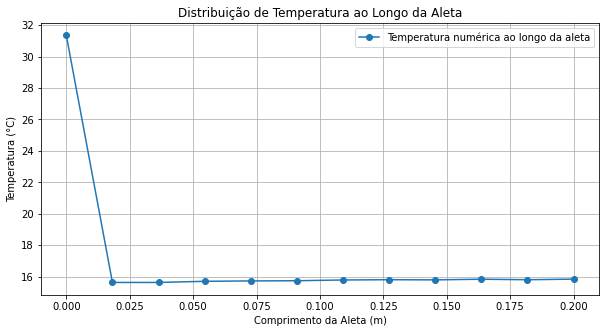

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

def acha_k(T):
    a = (156.88 - 155.68) / (51.67 - 37.38)
    k_t = a*T - a*37.78 + 155.68
    return k_t

# Parâmetros e configuração
L = 0.2  # Comprimento total da aleta em metros
delta_x = 0.015
L_termopar = 0.181  # Posição do último termopar em metros
T_base = 31.35  # Temperatura na base em °C
T_ambiente = 15.61  # Temperatura ambiente em °C
theta_0 = T_base - T_ambiente
delta_t = 10
Atr = math.pi * (0.012**2) # Atr
As = 2 * math.pi * 0.012 * L # Perímetro em metrosS
p = 0
A = 0.012 * 0.2  # Área da seção transversal em m²
k = acha_k(30.43)  # Chamada da função para calcular k
h = 7.5  # Valor estimado de h
m = np.sqrt(h * p / (k*Atr))  # Cálculo de m
c = 880000000
rho = 2794
lista_temps = [T_base,15.628,15.628,15.7,15.725,15.737,15.785,15.802,15.792,15.834,15.801,15.785]
lista_new_temps = [T_base,0,0,0,0,0,0,0,0,0,0,0]
n = 12
erro = 100000000000
erro_max = 0
while(erro>0.05):
    for i in range(0,n):
        if i!=0:
            if(i!=11):
                lista_new_temps[i] = lista_temps[i] + (delta_t/(c*rho*Atr*delta_x))*((k*Atr/delta_x)*(lista_temps[i-1]-2* lista_temps[i] + lista_temps[i+1]) - h*As*(-T_ambiente + lista_temps[i]))
            else:
                lista_new_temps[i] = lista_temps[i] + k*Atr/delta_x*(lista_temps[i-1]-lista_temps[i]) - h*As*(-T_ambiente + lista_temps[i]) - h*Atr*(-T_ambiente + lista_temps[i])
            erro = abs(lista_new_temps[i] - lista_temps[i]) / lista_new_temps[i]
            if erro>erro_max:
                erro_max = erro
    lista_temps = lista_new_temps.copy()
                
# Plotando os resultados
x_vals = np.linspace(0, L, n)  # Coordenadas dos pontos de discretização

plt.figure(figsize=(10, 5))
plt.plot(x_vals, lista_temps, label='Temperatura numérica ao longo da aleta', marker='o')
plt.title('Distribuição de Temperatura ao Longo da Aleta')
plt.xlabel('Comprimento da Aleta (m)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()



